In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set high-quality visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Load data
file_path = 'C:\\Users\\SC\\Desktop\\WINHMS Data Mining\\Data\\Room Type Analysis Kum.xlsx'
# Define column names based on Row 2
cols = ['Room_Type', 'Nights', 'Occ_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ADR', 'ARP']
df_room = pd.read_excel(file_path, skiprows=3, names=cols)

print("Libraries loaded and Kumarakom Room Type data imported.")

Libraries loaded and Kumarakom Room Type data imported.


In [3]:
# 1. Basic Cleaning: Remove rows with missing names or total/metadata rows
df_room = df_room.dropna(subset=['Room_Type'])
# We use .astype(str) to ensure the 'Room_Type' column is treated as strings before searching
df_room = df_room[~df_room['Room_Type'].astype(str).str.contains('Total|Grand Total|Contribution Analysis|Pay Master', case=False, na=False)]

# 2. Clean numeric columns (handling potential commas or strings)
numeric_cols = ['Nights', 'Occ_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ADR', 'ARP']

for col in numeric_cols:
    # Use .astype(str) BEFORE .str to ensure the accessor always works, 
    # regardless of whether the original data was interpreted as float, int, or object.
    df_room[col] = df_room[col].astype(str).str.replace(',', '').str.strip()
    
    # Now convert to numeric, turning any remaining non-numeric strings into NaN, then filling with 0
    df_room[col] = pd.to_numeric(df_room[col], errors='coerce').fillna(0)

# 3. Filter for active room types
df_active = df_room[df_room['Room_Revenue'] > 0].copy()

print(f"Cleaned {len(df_active)} room categories for analysis.")
df_active.head()

Cleaned 5 room categories for analysis.


,Room_Type,Nights,Occ_Pct,Pax,Room_Revenue,Revenue_Pct,ADR,ARP
0,Lakefront Villa w/ Plunge,110,8.92,263,1056772.91,12.42,9607.0265,4018.1479
1,Lakeview Terrace Rooms,313,25.39,675,1733770.63,20.37,5539.2033,2568.5491
3,Poolside Cottages,700,56.77,1517,4661089.31,54.77,6658.6990,3072.5704
4,Poolside Villa w Plunge P,106,8.60,259,910051.13,10.69,8585.3880,3513.7109
5,Three Bedroom Villa,4,0.32,19,148820.32,1.75,37205.0800,7832.6484


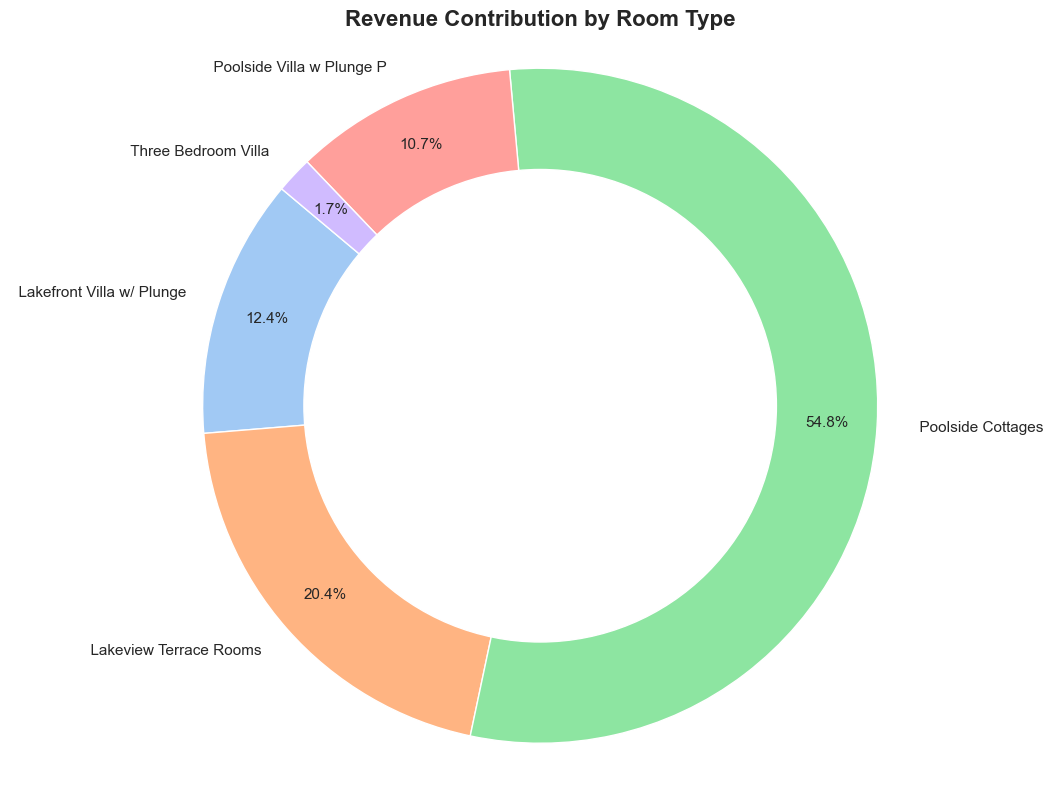

In [ ]:
# Best for seeing the contribution of each category to the total
plt.figure(figsize=(10, 8))
data = df_active['Room_Revenue']
labels = df_active['Room_Type']
colors = sns.color_palette('pastel')

# Create the pie
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.85)

# Add a circle at the center to make it a donut
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Revenue Contribution by Room Type', fontsize=16, fontweight='bold')
plt.axis('equal') 
plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. MAIN DRIVER: Poolside Cottages account for over 54% of the resort's room revenue.
#### 2. LUXURY IMPACT: The Lakefront and Poolside Villas together contribute ~23% of revenue, despite having lower inventory counts.

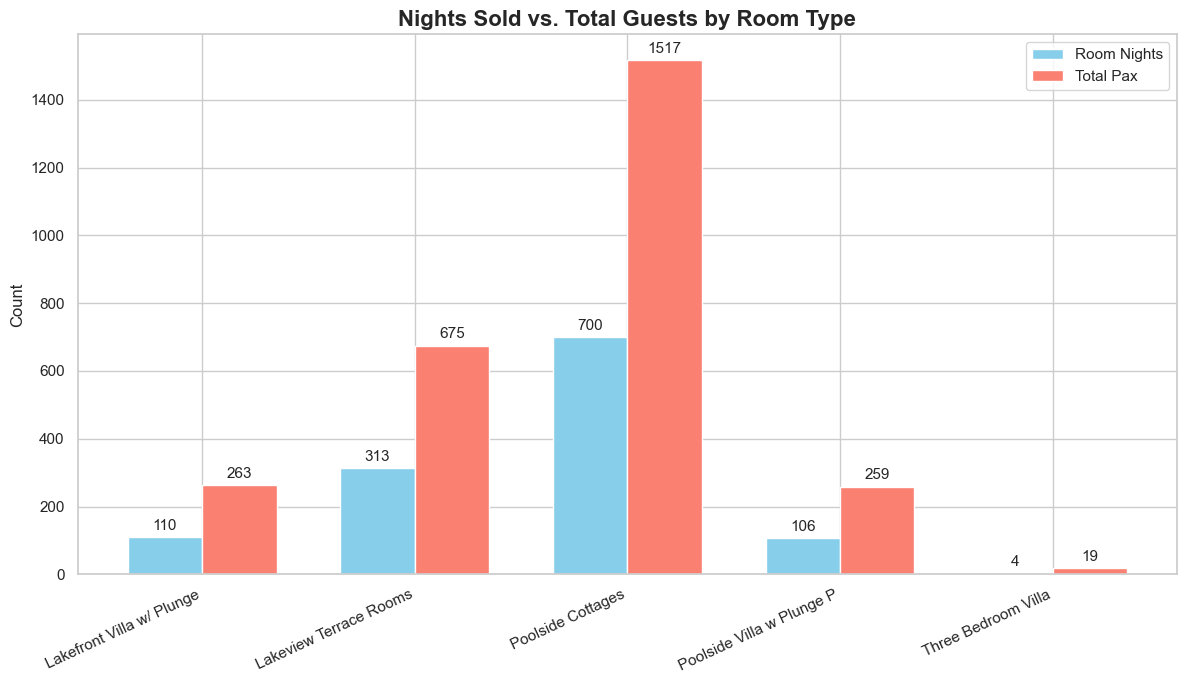

In [5]:
# Comparing volume (nights) and occupancy density (pax)
x = np.arange(len(df_active['Room_Type']))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, df_active['Nights'], width, label='Room Nights', color='skyblue')
rects2 = ax.bar(x + width/2, df_active['Pax'], width, label='Total Pax', color='salmon')

ax.set_ylabel('Count')
ax.set_title('Nights Sold vs. Total Guests by Room Type', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df_active['Room_Type'], rotation=25, ha='right')
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. CORE INVENTORY: Poolside Cottages are clearly the bulk of the resort (700 nights).
#### 2. GROUP SIZE: The gap between Pax and Nights is largest for the "Three Bedroom Villa," indicating it is used for larger family groups.

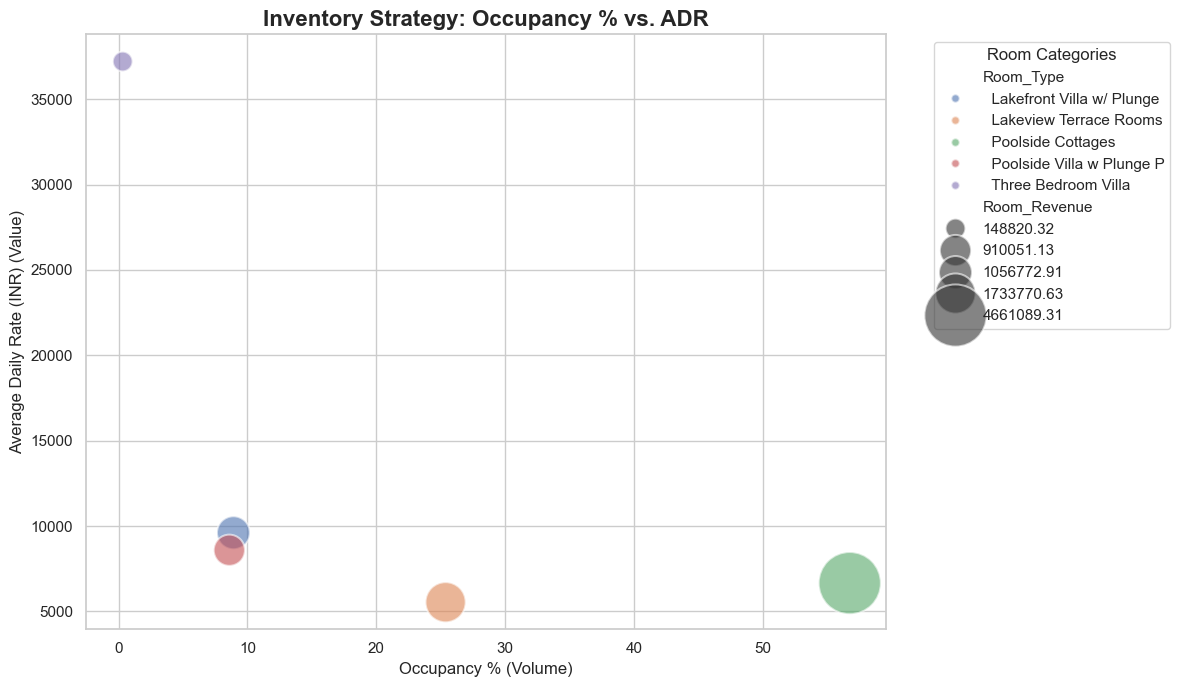

In [6]:
# Showing the relationship between volume (Occupancy %) and price (ADR)
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_active, x='Occ_Pct', y='ADR', size='Room_Revenue', 
                hue='Room_Type', sizes=(200, 2000), alpha=0.6)

plt.title('Inventory Strategy: Occupancy % vs. ADR', fontsize=16, fontweight='bold')
plt.xlabel('Occupancy % (Volume)', fontsize=12)
plt.ylabel('Average Daily Rate (INR) (Value)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Room Categories")

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. HIGH VOLUME: Poolside Cottages sit far to the right (High Occupancy, Moderate ADR).
#### 2. EXCLUSIVE VALUE: The Three Bedroom Villa is an outlier (Very high ADR, low relative occupancy).

In [7]:
# Compile the data into a final readable table
summary = df_active[['Room_Type', 'Nights', 'Occ_Pct', 'Room_Revenue', 'ADR', 'Revenue_Pct']].sort_values(by='Room_Revenue', ascending=False)
summary.to_csv('Kumarakom_Room_Type_Summary.csv', index=False)

print("Analysis Complete. Final Ranking by Revenue Contribution:")
summary

Analysis Complete. Final Ranking by Revenue Contribution:


,Room_Type,Nights,Occ_Pct,Room_Revenue,ADR,Revenue_Pct
3,Poolside Cottages,700,56.77,4661089.31,6658.6990,54.77
1,Lakeview Terrace Rooms,313,25.39,1733770.63,5539.2033,20.37
0,Lakefront Villa w/ Plunge,110,8.92,1056772.91,9607.0265,12.42
4,Poolside Villa w Plunge P,106,8.60,910051.13,8585.3880,10.69
5,Three Bedroom Villa,4,0.32,148820.32,37205.0800,1.75


#### Key Insights for Rhythm Kumarakom (Room Type):
#### 1. The Engine Room: The Poolside Cottages are the resort's foundation, contributing 54.77% of total revenue. This is a high-occupancy category that ensures steady cash flow.

#### 2. Premium Upgrades: Lakefront Villas command a significant premium (9,607 INR ADR) compared to the Lakeview Terrace Rooms (5,539 INR ADR). There is a huge opportunity to upsell Terrace guests into Lakefront inventory.

#### 3. Luxury Outlier: The Three Bedroom Villa is a unique product. While it only sold 4 nights, its ARR of 37,205 INR shows its extreme value for large groups or high-net-worth families.

#### 4. Inventory Balance: The resort has a healthy mix of "high-volume/moderate-rate" (Cottages) and "low-volume/high-rate" (Villas) products, protecting the resort against shifts in market demand.